<a href="https://colab.research.google.com/github/pDavidm/food-sales-predictions/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import missingno
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline
filename = '/content/drive/MyDrive/Data Science Class/week2/data/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()
df.duplicated().any()
#there doesn't seem to be any duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


False

In [22]:
df.head(40)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


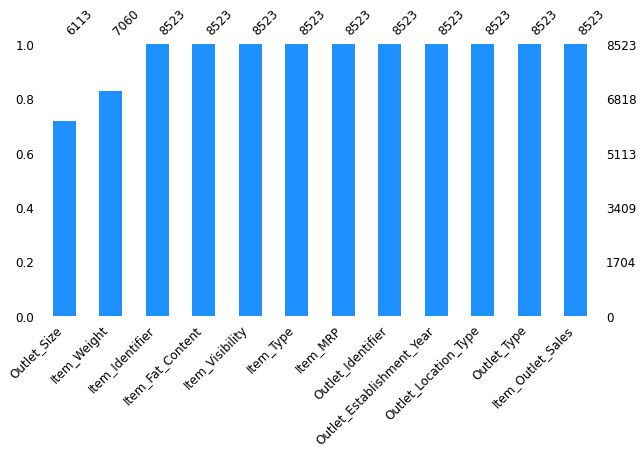

In [12]:
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);
#The Outlet_size and Item_Weight colums have missing data. I'm conserned that 0s in item visability might also be missing data but it might mean it does have zero visablity? perhaps something no longer on sale? 
# going to note the 0s but don't want to alter them without more info


In [21]:
df.Item_Fat_Content.unique()
#Item_Fat_Content column has inconsistant content

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular', 'Low Fat':'Low Fat', 'Regular':'Regular'}, na_action='ignore')

In [57]:
df.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [58]:
Outlet_filter = df['Outlet_Size'].isna()
out_df = df[Outlet_filter]
out_df['Outlet_Type'].value_counts()
out_df['Outlet_Identifier'].value_counts()
# two Outlet Types and three Outlet Identifiers are missing outlet size data. it's unclear if there is any direct connection. could be because they're too small? it might be best to add somekind of missing flag without more info to go off of

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

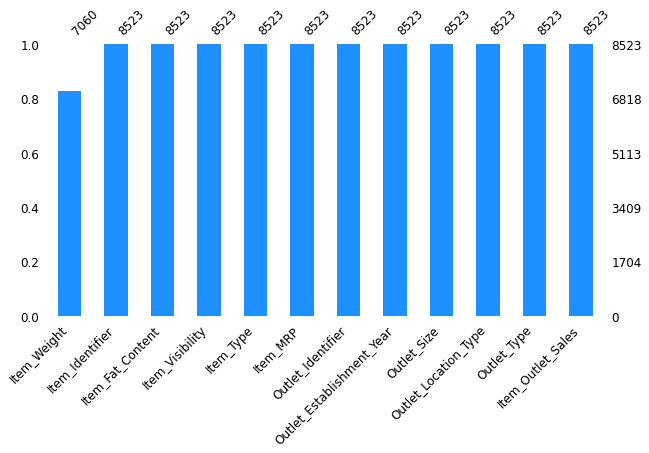

In [24]:
df[['Outlet_Size']] = df[['Outlet_Size']].fillna('Missing')
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [74]:
type_filter = df['Item_Type'] == 'Others'
type_df = df[type_filter]
type_df[['Item_Weight']].max()

Item_Weight    20.5
dtype: float64

In [69]:
df.groupby('Item_Type')[['Item_Weight']].mean()

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [64]:
weight_filter = df['Item_Weight'].isna()
weight_df = df[weight_filter]
weight_df['Item_Type'].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

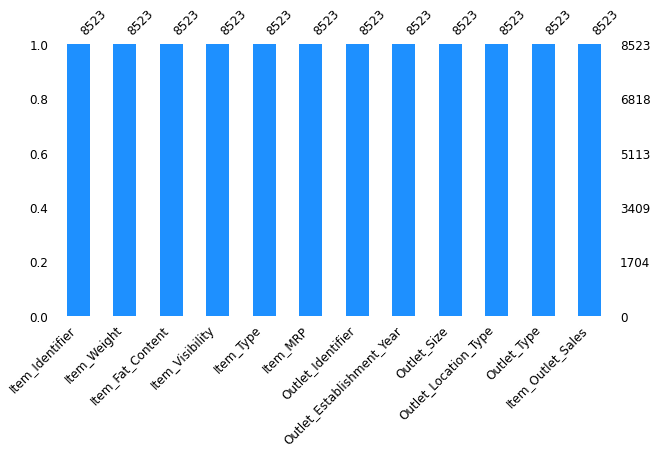

In [25]:
# it's probably not to most accurate way to clean this but the best idea I can come up with to fill the missing item_weight data is to use the means grouped by item type to just give them the average weight of thier item type
df["Item_Weight"] = df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))
missingno.bar(df, color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

In [26]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.39500,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.98788,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Missing,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Missing,Tier 2,Supermarket Type1,4710.5350
